# Predicting Boston Housing Prices¶

 The notebook is using the Boston Housing Prices dataset, which contains information about homes located in Boston in 1978. The dataset includes 14 columns of information about each home, such as the number of rooms in the home, the crime rate in the neighborhood, and the distance to employment centers.

The goal of the notebook is to use this information to predict the median value of homes in each neighborhood. Because the target variable (median home value) is continuous, this is a regression task. Additionally, because the target variable is included in the dataset, this is a supervised learning task.

# Dataset Feature Overview

CRIM - per capita crime rate by town\
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.\
INDUS - proportion of non-retail business acres per town\
CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\
NOX - nitric oxides concentration (parts per 10 million)\
RM - average number of rooms per dwelling\
AGE - proportion of owner-occupied units built prior to 1940\
DIS - weighted distances to five Boston employment centres\
RAD - index of accessibility to radial highways\
TAX - full-value property-tax rate per $10,000\
PTRATIO - Pupil-techer ratio by town\
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\
LSTAT - % lower status of the population\
MEDV (TARGET) - Median value of owner-occupied homes in 1000's

### Import The Libraries

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Reading Data

In [2]:
# Reading Data
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
X = pd.DataFrame(housing.data, columns= housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
y = pd.DataFrame(housing.target, columns=['target'])
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [6]:
data = pd.concat([X, y], axis=1)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
data.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
1719,6.0115,3.0,5.533981,1.056311,1024.0,1.988350,37.98,-122.33,1.750
6990,2.5686,25.0,3.539663,1.098558,2313.0,2.780048,33.97,-118.04,1.775
4242,2.2148,38.0,3.516097,1.106640,1939.0,1.950704,34.11,-118.33,4.383
11670,4.5000,28.0,5.102117,1.043587,2112.0,2.630137,33.84,-118.01,2.021
3316,3.1250,9.0,6.657754,1.251337,517.0,2.764706,38.94,-122.69,0.934
14823,1.4844,52.0,3.943662,1.000000,217.0,3.056338,32.67,-117.11,0.833
4809,1.3444,47.0,3.793307,1.104331,1349.0,2.655512,34.03,-118.34,1.250
7964,3.4375,46.0,4.044346,0.971175,1200.0,2.660754,33.86,-118.19,1.567
14932,3.9519,15.0,6.907496,1.114833,2046.0,3.263158,32.64,-116.99,1.935
7790,3.0777,17.0,4.341797,1.062500,2008.0,3.921875,33.89,-118.07,1.608


In [8]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

### Exploratory Data Analysis (EDA)

EDA (Exploratory Data Analysis) is a process that involves understanding the data by calculating statistics and creating visualizations such as charts and figures. The purpose of EDA is to discover patterns, relationships, and anomalies in the data that could have an impact on our analysis.

In [9]:
data.shape

(20640, 9)

This dataset has 506 rows (observations) and 14 columns (features) including our target variable MEDV. One thing to note right off the bat is the CHAS column is a binary variable and the RAD variable appears to be a categorical variable as well.

In [10]:
# Column Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution
data.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [12]:
# To check the number of unique values in each column
num_unique = data.nunique()
num_unique

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
target         3842
dtype: int64

In [13]:
# count the number of duplicate rows
data.duplicated().sum()

0

In [14]:
# count the number of missing values (NaN values) in each column.
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [15]:
# Calculate the correlation matrix
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


## Visualization

In [16]:
# Accessing the column names
column_names = data.columns
print(column_names)


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')


<ipython-input-17-8decc0651e83>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[column_names[i]],shade=True, color='r')
<ipython-input-17-8decc0651e83>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[column_names[i]],shade=True, color='r')
<ipython-input-17-8decc0651e83>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[column_names[i]],shade=True, color='r')
<ipython-input-17-8decc0651e83>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[column_names[i]],shade=True, col

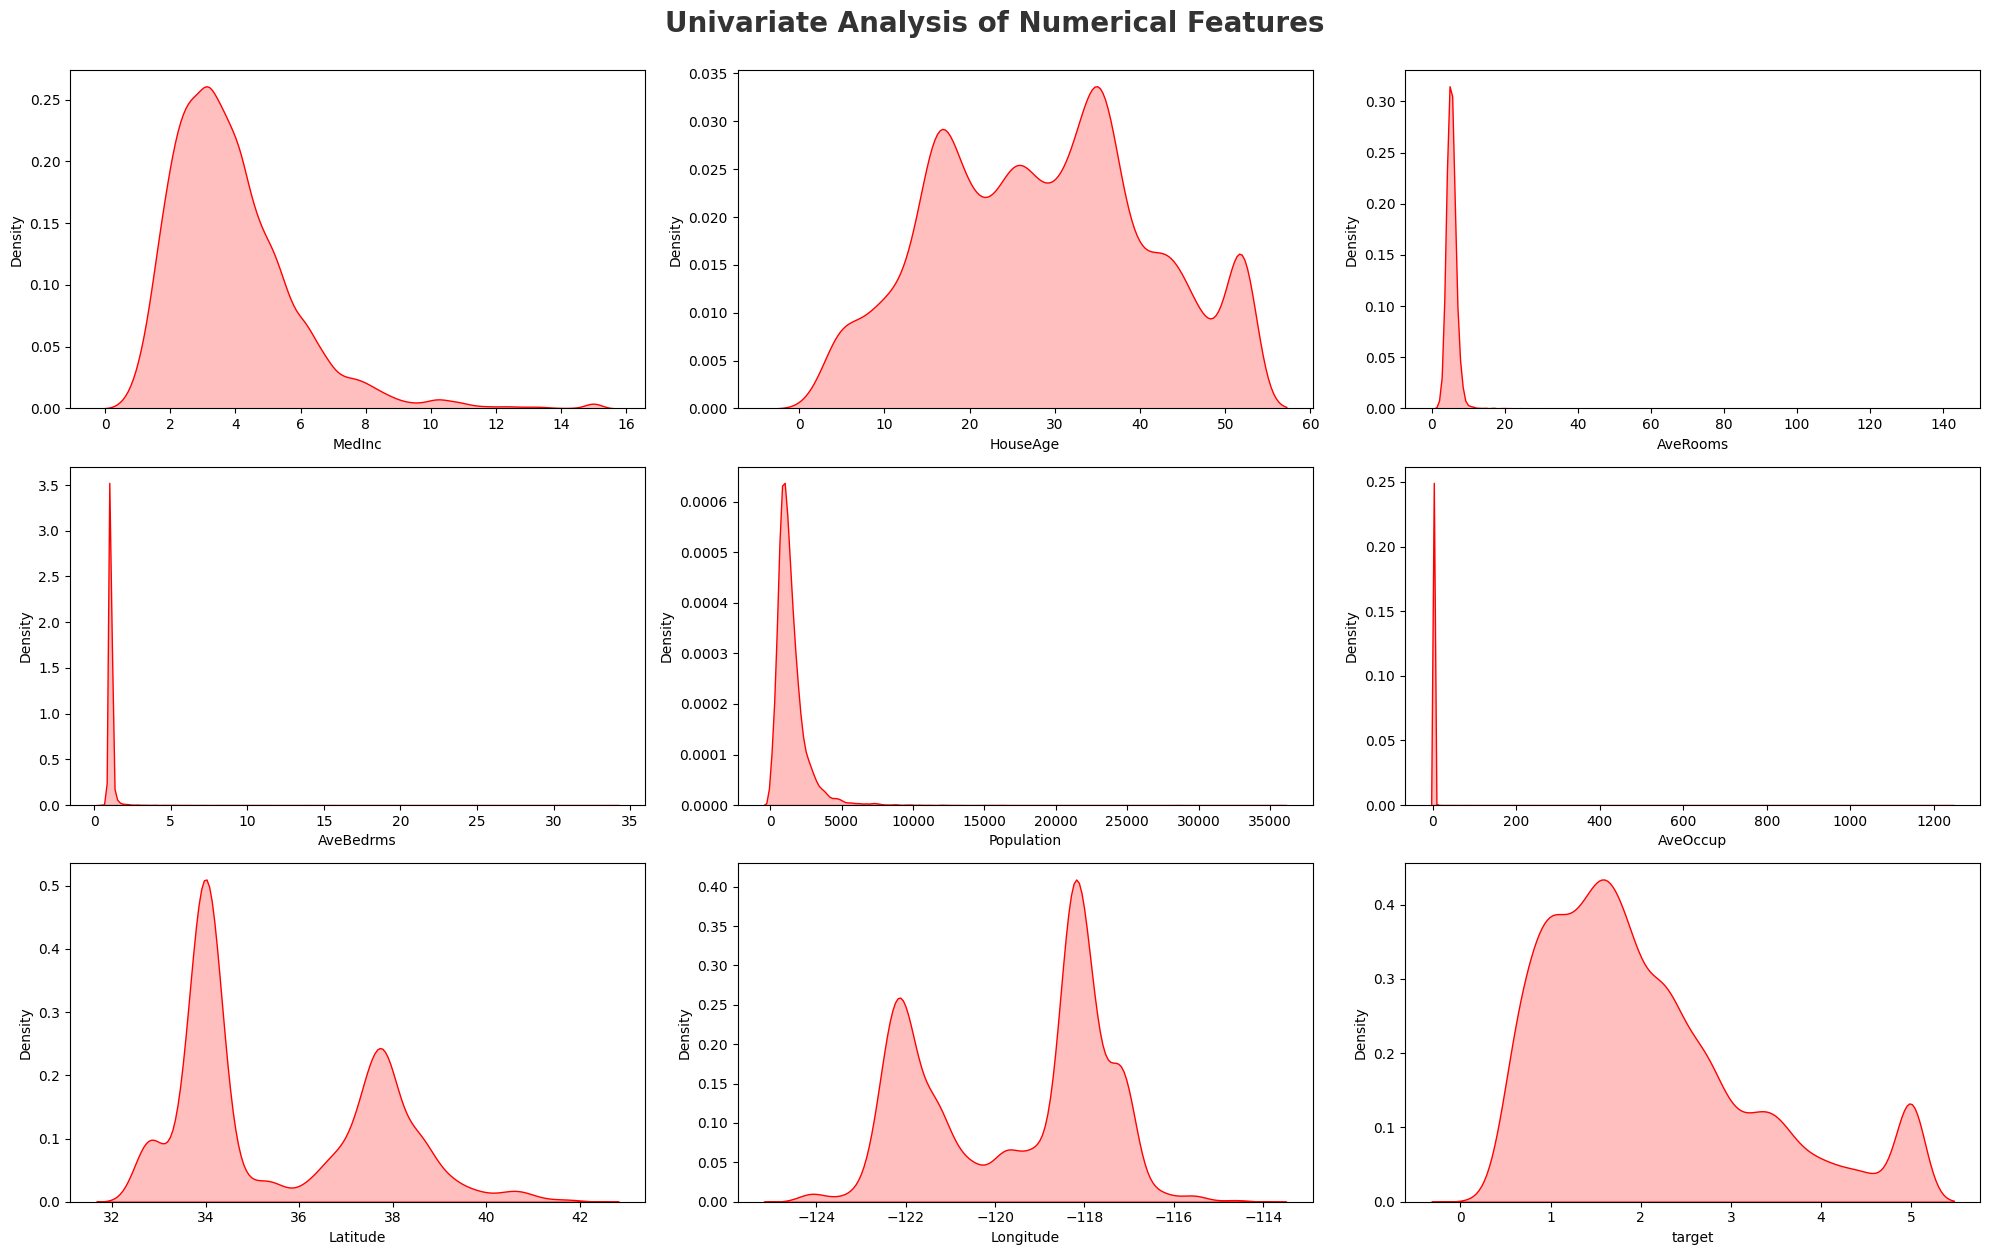

In [17]:
plt.figure(figsize=(20, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(column_names)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[column_names[i]],shade=True, color='r')
    plt.xlabel(column_names[i])
    plt.tight_layout()

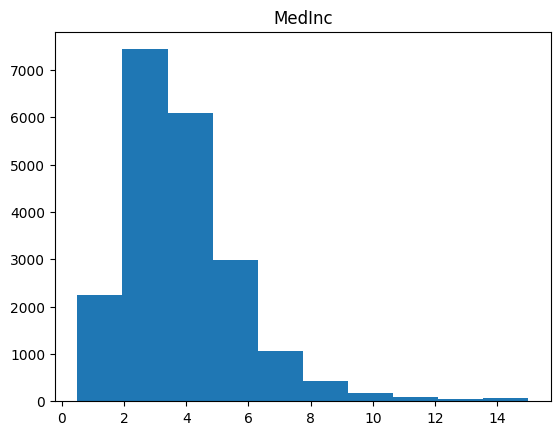

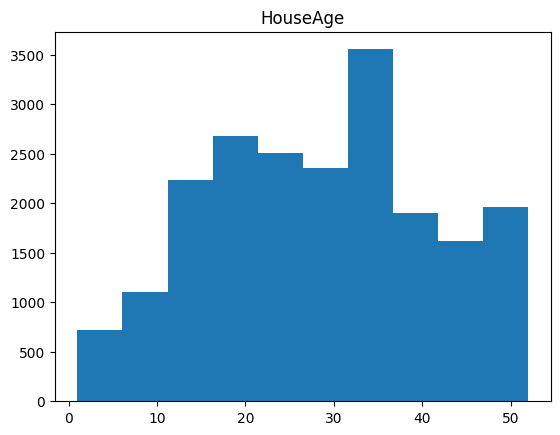

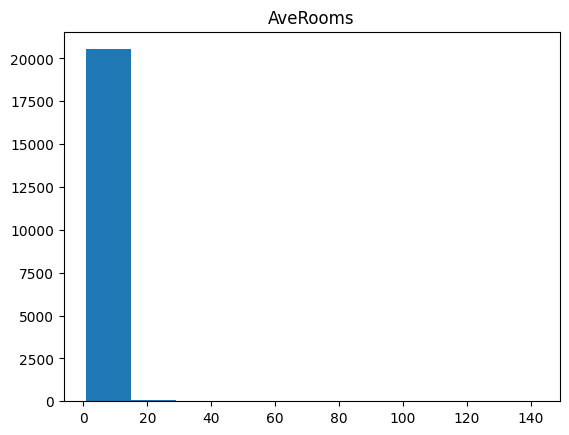

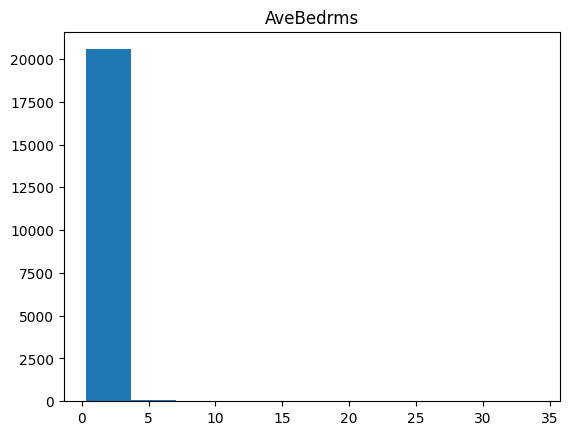

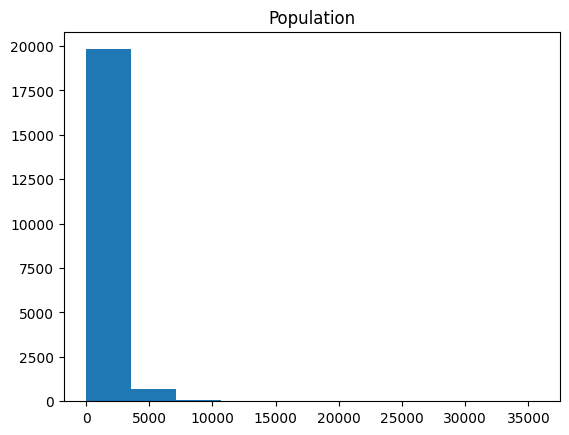

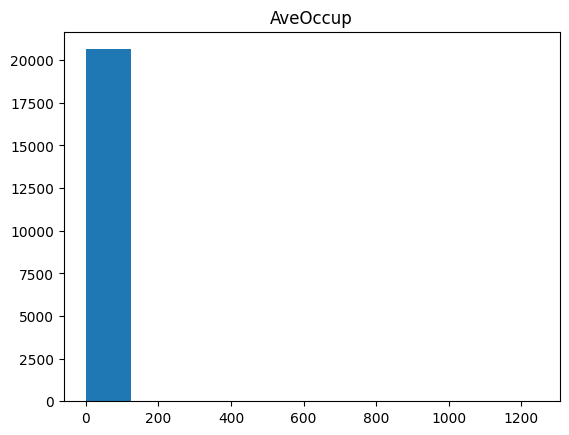

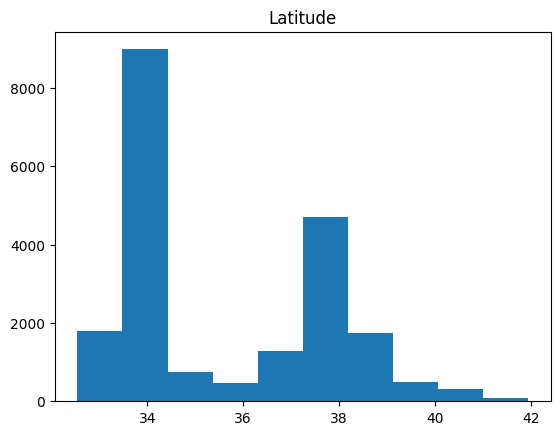

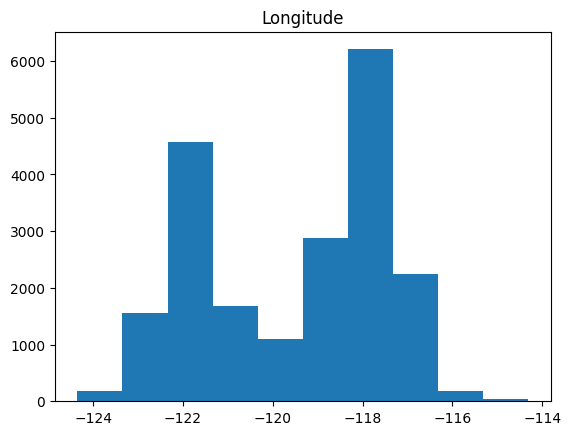

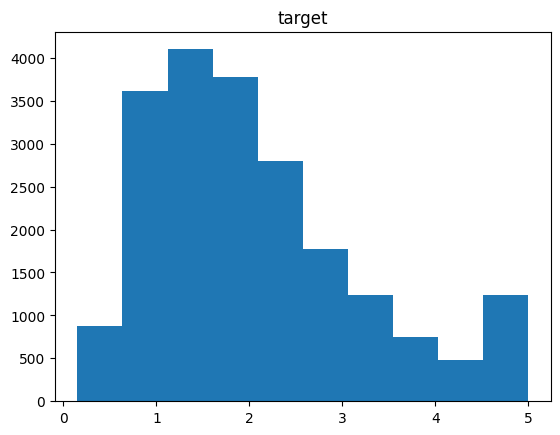

In [18]:
# histogram
for col in column_names:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(data[col]):
        # If the column is numeric, create a histogram using matplotlib
        plt.hist(data[col])
        plt.title(col)
        plt.show()

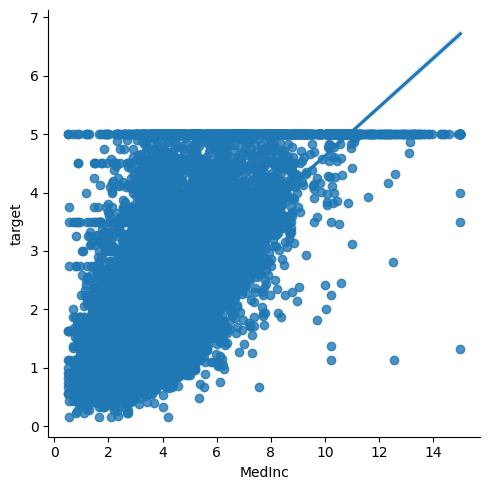

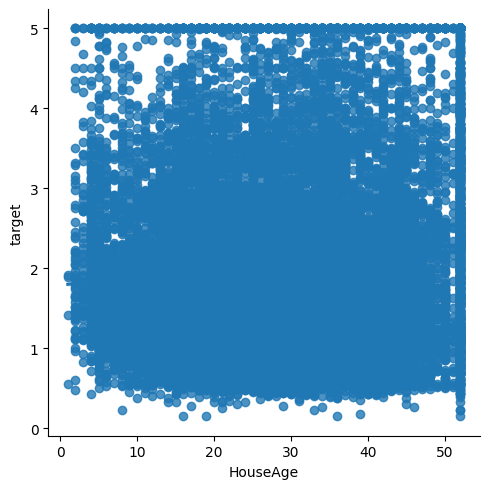

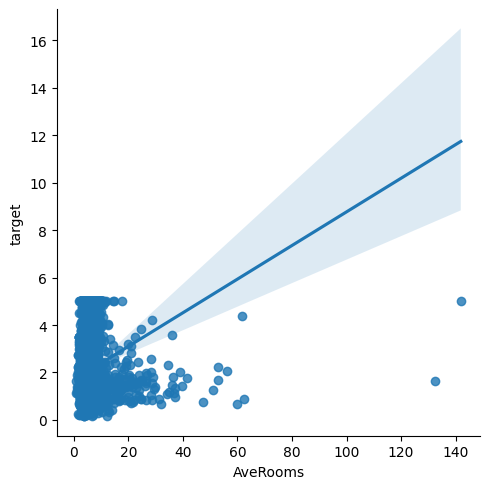

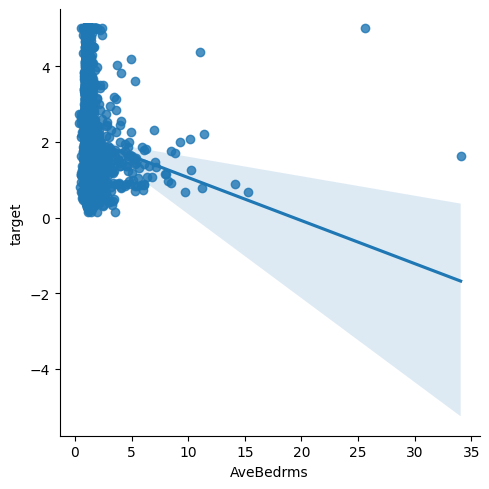

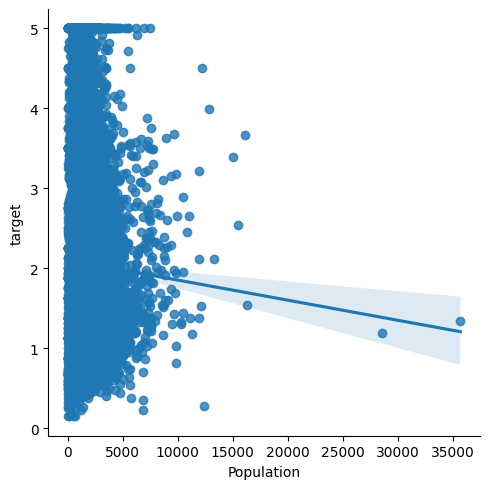

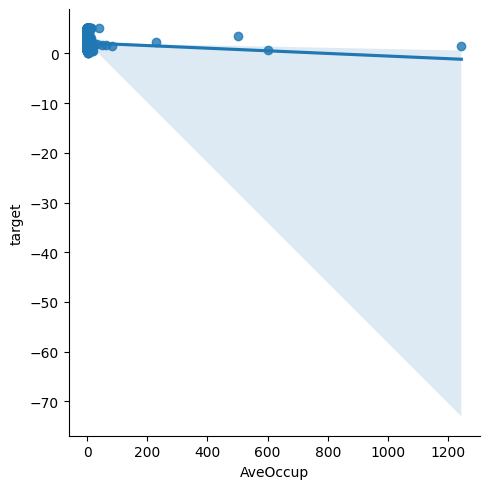

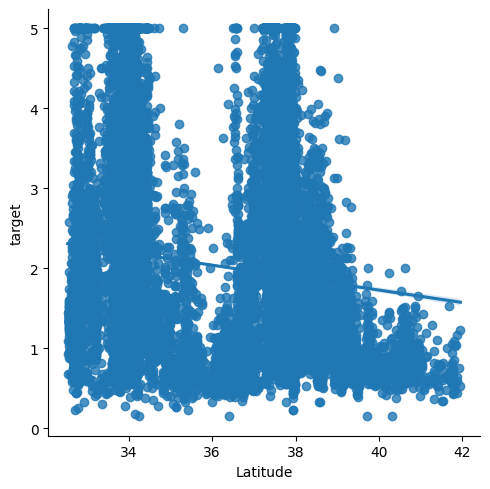

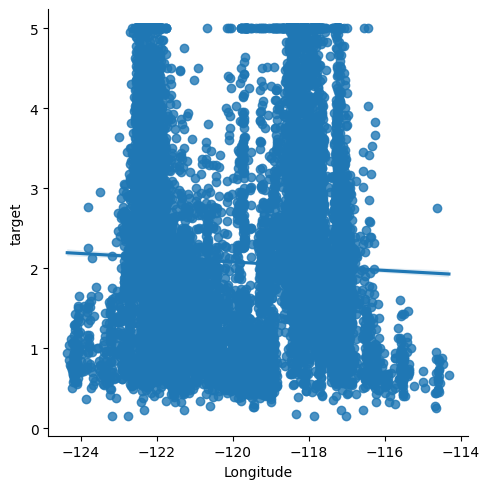

In [19]:
# lmplot, which is a function in the Seaborn library used to create linear regression plots.
# A linear regression plot is a visualization of the relationship between two variables,
# with a linear regression line fitted to the data. It can be useful for exploring the correlation between two variables and for making predictions.
for feature in column_names[:-1]:
    sns.lmplot(x=feature, y='target', data=data)

<Axes: >

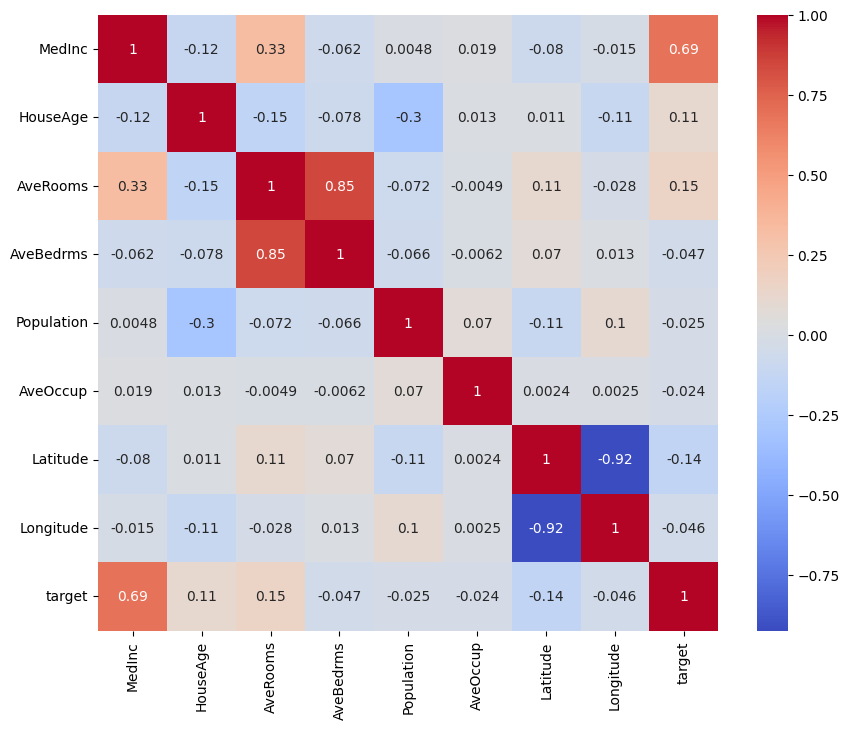

In [20]:
# Generate a correlation matrix
corr_matrix = data.corr()

# Create a larger figure
plt.figure(figsize=(10, 8))

# Create the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

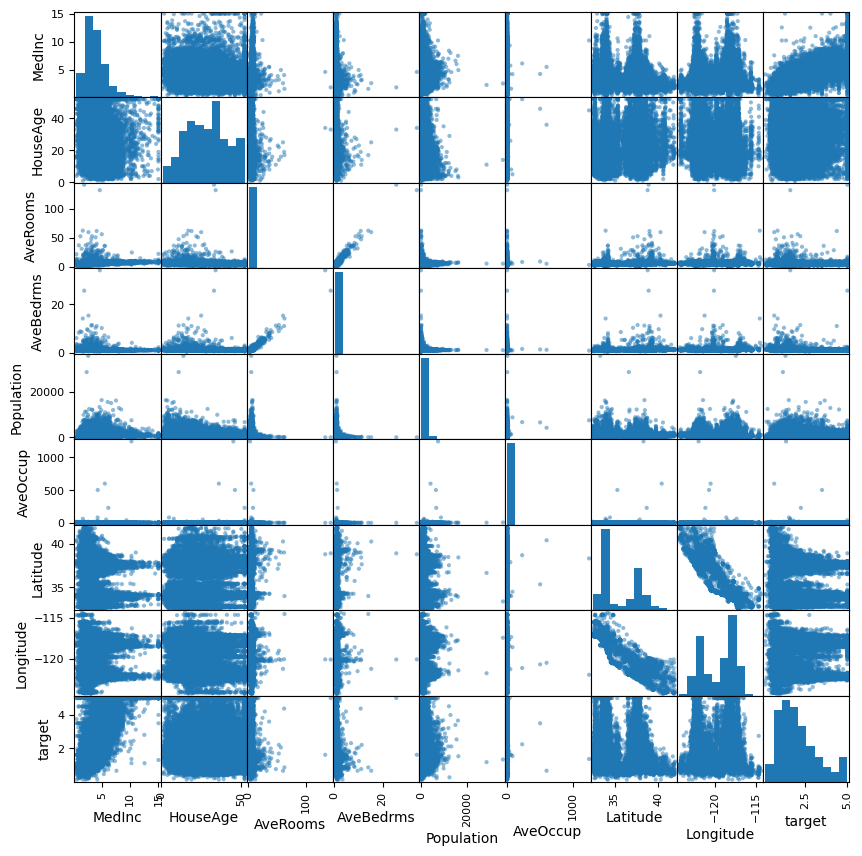

In [21]:
pd.plotting.scatter_matrix(data, figsize=(10, 10))
plt.show()

## Divide  the dataset into independent and dependent

In [22]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [23]:
y

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [24]:
X.shape

(20640, 8)

In [25]:
y.shape

(20640, 1)

In [26]:
#splitting a dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, random_state=42)

In [27]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(15480, 8)
(5160, 8)
(11610, 8)
(3870, 8)


### **Building the Neural Network**

In [28]:
LAYERS = [
         tf.keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
         tf.keras.layers.Dense(10, activation="relu"),
         tf.keras.layers.Dense(5, activation='relu'),
         tf.keras.layers.Dense(1)

]

In [29]:
model = tf.keras.models.Sequential(LAYERS)

In [30]:
# # For calculating accuracy score (r2 score)
# from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [31]:
LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[coeff_determination])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [34]:
EPOCHS = 5

history = model.fit( X_train, y_train, epochs= EPOCHS, validation_data=(X_valid, y_valid))

Epoch 1/5
363/363 [==============================] - 2s 4ms/step - loss: 1.0959 - coeff_determination: 0.1457 - val_loss: 0.6599 - val_coeff_determination: 0.4416
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4787 - coeff_determination: 0.6177 - val_loss: 0.3901 - val_coeff_determination: 0.6817
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4147 - coeff_determination: 0.6713 - val_loss: 0.3822 - val_coeff_determination: 0.6839
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3951 - coeff_determination: 0.6851 - val_loss: 0.3646 - val_coeff_determination: 0.6996
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3811 - coeff_determination: 0.6996 - val_loss: 0.3602 - val_coeff_determination: 0.7063


In [35]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,1.095878,0.145736,0.659932,0.441647
1,0.478700,0.617674,0.390130,0.681652
2,0.414713,0.671257,0.382158,0.683889
3,0.395123,0.685122,0.364598,0.699550
4,0.381094,0.699607,0.360151,0.706300


<Axes: >

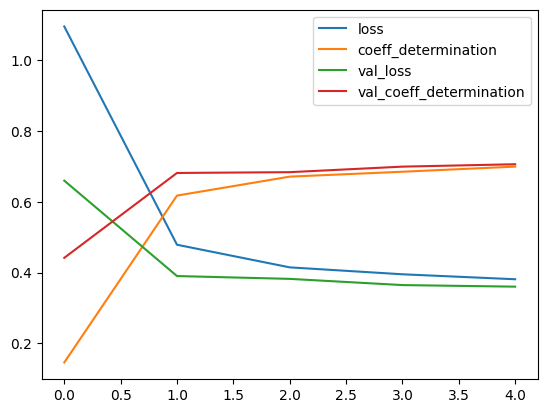

In [36]:
pd.DataFrame(history.history).plot()

In [37]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3788 - coeff_determination: 0.6922


[0.37878620624542236, 0.6921661496162415]

In [38]:
X_test.shape

(5160, 8)

In [39]:
new = X_test[0]

In [40]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [41]:
new.reshape((1,8))

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ]])

In [42]:
model.predict(new.reshape((1,8)))

1/1 [==============================] - 0s 93ms/step


array([[0.9518378]], dtype=float32)

## Thank You